In [4]:
# Dependencies
%matplotlib inline

import matplotlib.pyplot as plt
import json
import requests
import os
import pandas as pd
import numpy as np
import gmaps
import requests

from scipy.stats import linregress
from dotenv import load_dotenv
from citipy import citipy
from datetime import datetime
import time

# Import API key
load_dotenv()
api_key = os.getenv("OpenWeather_API_KEY")
g_key = os.getenv("g_key")

# Configure gmaps
gmaps.configure(api_key=g_key)

In [5]:
# Create a list for holding the cities.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [6]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

642

In [7]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

city_url

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | albany
Processing Record 2 of Set 1 | quatre cocos
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | saint-augustin
Processing Record 5 of Set 1 | saskylakh
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | tarauaca
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | saint-pierre
Processing Record 12 of Set 1 | port lincoln
Processing Record 13 of Set 1 | batagay-alyta
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | busselton
Processing Record 16 of Set 1 | moulins
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | ituni
City not found. Skipping...
Processing Record 19 of Set 1 | saldanha
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | redding
Processing Record 22 of Set 1 | karakendz

Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | young
Processing Record 39 of Set 4 | hambantota
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | salalah
Processing Record 42 of Set 4 | sarkand
Processing Record 43 of Set 4 | kyotera
Processing Record 44 of Set 4 | tocache
Processing Record 45 of Set 4 | rawannawi
City not found. Skipping...
Processing Record 46 of Set 4 | talaya
Processing Record 47 of Set 4 | genhe
Processing Record 48 of Set 4 | dikson
Processing Record 49 of Set 4 | dukat
Processing Record 50 of Set 4 | solnechnyy
Processing Record 1 of Set 5 | bria
Processing Record 2 of Set 5 | arraial do cabo
Processing Record 3 of Set 5 | rolim de moura
City not found. Skipping...
Processing Record 4 of Set 5 | bac lieu
Processing Record 5 of Set 5 | boende
Processing Record 6 of Set 5 | cherskiy
Processing Record 7 of Set 5 | burica
City not found. Skipping...
Processing Record 8 of Se

Processing Record 26 of Set 8 | lowestoft
Processing Record 27 of Set 8 | pasni
Processing Record 28 of Set 8 | tual
Processing Record 29 of Set 8 | yongan
Processing Record 30 of Set 8 | sioux lookout
Processing Record 31 of Set 8 | longyearbyen
Processing Record 32 of Set 8 | hamilton
Processing Record 33 of Set 8 | clearwater
Processing Record 34 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 35 of Set 8 | mount isa
Processing Record 36 of Set 8 | bogotol
Processing Record 37 of Set 8 | belushya guba
City not found. Skipping...
Processing Record 38 of Set 8 | isangel
Processing Record 39 of Set 8 | aksarayskiy
Processing Record 40 of Set 8 | terrace bay
Processing Record 41 of Set 8 | knysna
Processing Record 42 of Set 8 | amderma
City not found. Skipping...
Processing Record 43 of Set 8 | fort nelson
Processing Record 44 of Set 8 | oleksandrivka
Processing Record 45 of Set 8 | thompson
Processing Record 46 of Set 8 | manzhouli
Processing Record 47 of Set 8 |

Processing Record 13 of Set 12 | canelones
Processing Record 14 of Set 12 | payakumbuh
Processing Record 15 of Set 12 | teya
Processing Record 16 of Set 12 | a
City not found. Skipping...
Processing Record 17 of Set 12 | ixtapa
Processing Record 18 of Set 12 | mattoon
Processing Record 19 of Set 12 | stornoway
Processing Record 20 of Set 12 | la ronge
Processing Record 21 of Set 12 | bakchar
Processing Record 22 of Set 12 | poum
Processing Record 23 of Set 12 | adrar
Processing Record 24 of Set 12 | aksu
Processing Record 25 of Set 12 | santa rosalia
Processing Record 26 of Set 12 | uige
Processing Record 27 of Set 12 | pag
Processing Record 28 of Set 12 | rungata
City not found. Skipping...
Processing Record 29 of Set 12 | haradok
Processing Record 30 of Set 12 | champerico
Processing Record 31 of Set 12 | killybegs
Processing Record 32 of Set 12 | kloulklubed
Processing Record 33 of Set 12 | chimbote
Processing Record 34 of Set 12 | kijang
Processing Record 35 of Set 12 | bilibino
Pr

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=7818e16cca2b62a3109d0a324d8b034e&q=airai'

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

#new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

#Then, we assign a new or the same DataFrame with new column order:

#city_data_df = df[new_column_order]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Albany,42.6001,-73.9662,69.58,80,76,2.82,US,2022-08-01 05:34:25
1,Quatre Cocos,-20.2078,57.7625,74.08,76,28,12.01,MU,2022-08-01 05:36:24
2,Mahebourg,-20.4081,57.7000,74.25,83,75,18.41,MU,2022-08-01 05:36:24
3,Saint-Augustin,51.2260,-58.6502,64.06,70,96,7.18,CA,2022-08-01 05:36:25
4,Saskylakh,71.9167,114.0833,45.23,81,100,8.86,RU,2022-08-01 05:36:25
5,Jamestown,42.0970,-79.2353,69.39,70,0,8.05,US,2022-08-01 05:36:25
6,Tarauaca,-8.1614,-70.7656,76.84,75,68,2.26,BR,2022-08-01 05:36:26
7,Bengkulu,-3.8004,102.2655,84.36,70,61,8.28,ID,2022-08-01 05:36:26
8,Hobart,-42.8794,147.3294,53.26,64,75,19.57,AU,2022-08-01 05:36:26
9,Rikitea,-23.1203,-134.9692,72.59,74,99,26.60,PF,2022-08-01 05:36:27


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
## Reimport the csv if re-running cells
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,Albany,42.6001,-73.9662,69.58,80,76,2.82,US,2022-08-01 05:34:25
1,1,Quatre Cocos,-20.2078,57.7625,74.08,76,28,12.01,MU,2022-08-01 05:36:24
2,2,Mahebourg,-20.4081,57.7000,74.25,83,75,18.41,MU,2022-08-01 05:36:24
3,3,Saint-Augustin,51.2260,-58.6502,64.06,70,96,7.18,CA,2022-08-01 05:36:25
4,4,Saskylakh,71.9167,114.0833,45.23,81,100,8.86,RU,2022-08-01 05:36:25


In [11]:
# Get today's date in seconds.
today = time.strftime("%x")
today

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [12]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

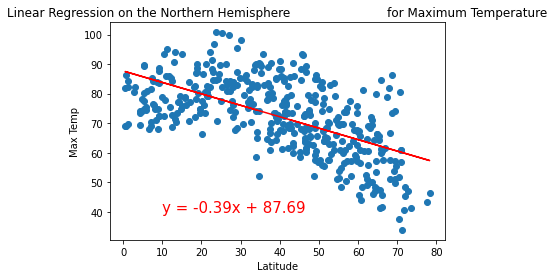

In [13]:

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

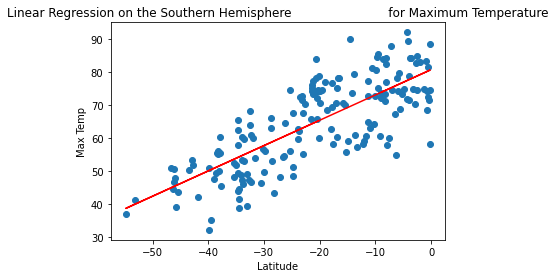

In [14]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

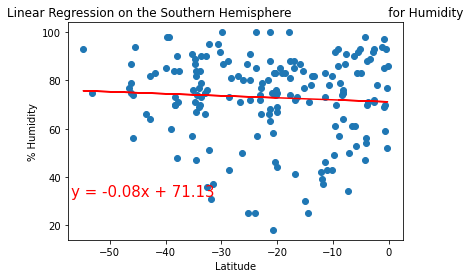

In [15]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Humidity', '% Humidity',(-57,32))

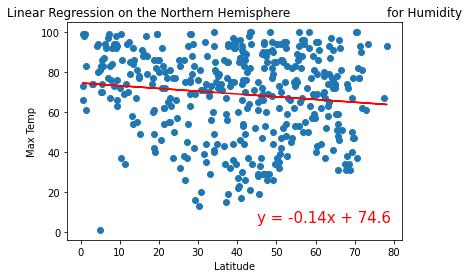

In [16]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Humidity', 'Max Temp',(45,5))

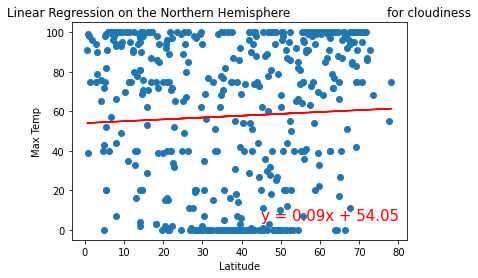

In [18]:
# Scatter plot for latitude vs. Cloudiness (Northern hem)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for cloudiness', 'Max Temp',(45,5))

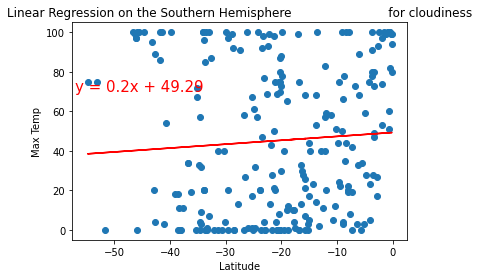

In [19]:
# Scatter plot for latitude vs. Cloudiness (southern hem)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for cloudiness', 'Max Temp',(-57,70))

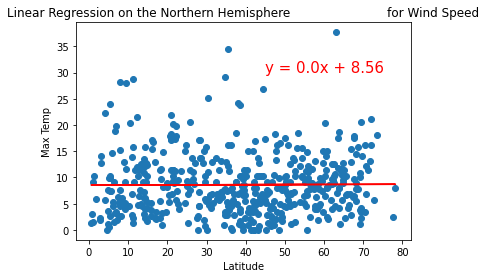

In [20]:
# Build the scatter plot for Wind Speed.

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Max Temp',(45,30))

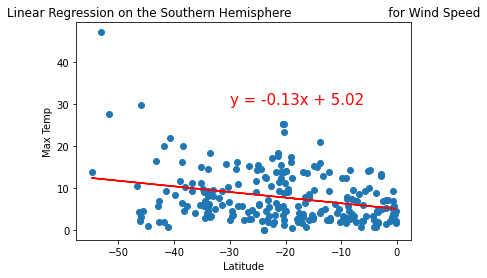

In [21]:
# Build the scatter plot for Wind Speed.

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Max Temp',(-30,30))

In [22]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")



# Import the dependencies.
import pandas as pd
import gmaps
import requests
load_dotenv()
g_key = os.getenv("g_key")

city_data_df

,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Description
0,0,Aguas Vermelhas,-15.7472,-41.4600,56.28,98,21,2.39,BR,2022-07-20 05:34:22,few clouds
1,1,Adrar,20.5022,-10.0711,85.60,17,15,5.39,MR,2022-07-20 05:34:23,few clouds
2,2,Albany,42.6001,-73.9662,72.54,87,51,4.88,US,2022-07-20 05:32:08,broken clouds
3,3,Mataura,-46.1927,168.8643,43.48,84,97,2.39,NZ,2022-07-20 05:34:23,overcast clouds
4,4,Tiksi,71.6872,128.8694,34.14,95,100,13.06,RU,2022-07-20 05:34:24,overcast clouds
...,...,...,...,...,...,...,...,...,...,...,...
713,713,Tsiroanomandidy,-18.7667,46.0333,67.12,48,12,12.30,MG,2022-07-20 05:53:50,few clouds
714,714,Wagar,16.1525,36.2032,86.40,52,71,17.16,SD,2022-07-20 05:53:50,broken clouds
715,715,Polyarnyy,69.1989,33.4478,54.32,87,100,10.89,RU,2022-07-20 05:51:45,overcast clouds
716,716,Hay River,60.8156,-115.7999,62.58,72,68,14.97,CA,2022-07-20 05:51:39,broken clouds


In [39]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(
    locations, 
    weights=[max(temp, 0) for temp in max_temp],
    dissipating=False,
    max_intensity=300,
    point_radius=4)

# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [40]:
# Heatmap of Humidity
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
humidity = city_data_df["Humidity"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
humidity_layer = gmaps.heatmap_layer(
    locations, 
    weights= humidity,
    dissipating=False,
    max_intensity=300,
    point_radius=4)

# Add the heatmap layer.
fig.add_layer(humidity_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [42]:
# Heatmap of cloudiness
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
clouds = city_data_df["Cloudiness"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
cloudiness_layer = gmaps.heatmap_layer(
    locations, 
    weights= clouds,
    dissipating=False,
    max_intensity=300,
    point_radius=4)

# Add the heatmap layer.
fig.add_layer(cloudiness_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [43]:
# Heatmap of cloudiness
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
wind = city_data_df["Wind Speed"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
wind_layer = gmaps.heatmap_layer(
    locations, 
    weights= wind,
    dissipating=False,
    max_intensity=300,
    point_radius=4)

# Add the heatmap layer.
fig.add_layer(wind_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [44]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]

preferred_cities_df.head(10)

What is the minimum temperature you would like for your trip? 74
What is the maximum temperature you would like for your trip? 75


,City_ID,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Description
22,22,Rikitea,-23.1203,-134.9692,74.08,77,4,7.18,PF,2022-07-20 05:34:30,clear sky
23,23,Jamestown,42.0970,-79.2353,74.79,86,0,0.00,US,2022-07-20 05:30:33,clear sky
56,56,Igrim,63.1906,64.4162,74.50,41,72,7.11,RU,2022-07-20 05:35:42,broken clouds
88,88,Saint-Philippe,-21.3585,55.7679,74.79,70,50,18.32,RE,2022-07-20 05:35:53,scattered clouds
155,155,Fuldatal,51.3833,9.5667,74.59,43,0,4.61,DE,2022-07-20 05:38:18,clear sky
190,190,Spencer,43.1414,-95.1444,74.52,64,0,13.80,US,2022-07-20 05:39:32,clear sky
191,191,Oxilithos,38.5833,24.1167,74.71,61,0,23.85,GR,2022-07-20 05:39:32,clear sky
270,270,Ciudad Bolivar,8.1222,-63.5497,75.00,93,100,2.64,VE,2022-07-20 05:41:04,overcast clouds
443,443,Panaba,21.2833,-88.2667,74.08,93,15,6.82,MX,2022-07-20 05:46:11,few clouds
453,453,Khorinsk,52.1657,109.7726,74.16,52,95,13.78,RU,2022-07-20 05:46:16,overcast clouds


In [46]:
hotel_df = preferred_cities_df[["City","Country","Max Temp","Lat","Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df

,City,Country,Max Temp,Lat,Lng,Hotel Name
22,Rikitea,PF,74.08,-23.1203,-134.9692,
23,Jamestown,US,74.79,42.0970,-79.2353,
56,Igrim,RU,74.50,63.1906,64.4162,
88,Saint-Philippe,RE,74.79,-21.3585,55.7679,
155,Fuldatal,DE,74.59,51.3833,9.5667,
190,Spencer,US,74.52,43.1414,-95.1444,
191,Oxilithos,GR,74.71,38.5833,24.1167,
270,Ciudad Bolivar,VE,75.00,8.1222,-63.5497,
443,Panaba,MX,74.08,21.2833,-88.2667,
453,Khorinsk,RU,74.16,52.1657,109.7726,


In [47]:
# Dependencies and Setup
import requests
import gmaps


# Set parameters to search for a hotel.
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

# Create counter.
record_count = 1

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
   


    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count}")
    # Add 1 to the record count.
    record_count += 1
    
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"
    

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1
Processing Record 2
Processing Record 3
Processing Record 4
Processing Record 5
Processing Record 6
Processing Record 7
Processing Record 8
Processing Record 9
Processing Record 10
Processing Record 11
Processing Record 12
Processing Record 13
Processing Record 14
Processing Record 15
Processing Record 16
Processing Record 17
-----------------------------
Data Retrieval Complete      
-----------------------------


In [2]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

NameError: name 'hotel_df' is not defined

In [3]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

NameError: name 'hotel_df' is not defined